In [2]:
import mujoco
import mediapy as media

In [39]:
robot = mujoco.MjModel.from_xml_path("assets/scene.xml")
data = mujoco.MjData(robot)

""

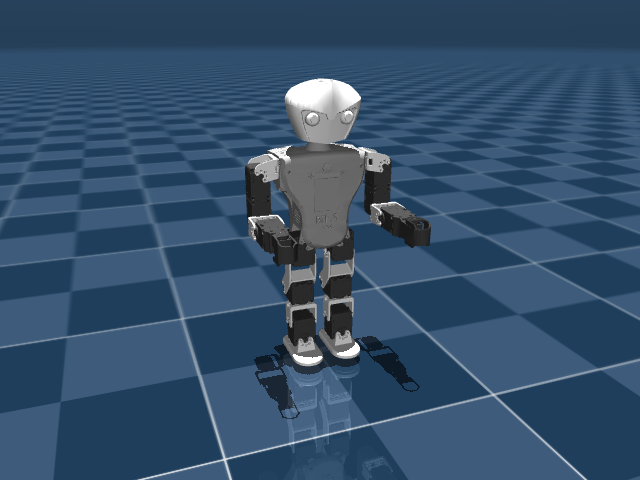

In [40]:
with mujoco.Renderer(model=robot, height=480, width=640) as renderer:
    mujoco.mj_forward(robot, data)
    renderer.update_scene(data)
    media.show_image(renderer.render())

In [36]:
mujoco.mj_saveLastXML("mh5_revH.xml", robot)